<font size=6 face="微软雅黑">**Almost Exact simulation of the 3/2 model**</font>

Different from Baldeaux ([2012](https://doi.org/10.1142/S021902491250032X)), we use an almost exact way to calculate the option price under the 3/2 model. The dynamics of the stock price under the 3/2 model under the risk-neutral measure are given by

$$
 \frac{dS_t}{S_t} = rdt + \sqrt{V_t}\rho dW_t^1 + \sqrt{V_t}\sqrt{1-\rho^2}dW_t^2 \tag{1}
$$

$$
 dV_t = \kappa V_t (\theta - V_t)dt + \epsilon V_t^{3/2}dW_t^1 \tag{2}
$$

where $W_t^1$ and $W_t^2$ are independent Brownian motions. Regarding the parameters, $r$ represents the constant interest rate, $\rho$ the instantaneous correlation between the return on the stock and the variance process and $\epsilon$ governs the volatility of volatility. The speed of mean reversion is given by $\kappa V_t$ and $\theta$ denotes the long-run mean of the variance process.

Defining $X_t = \frac{1}{V_t}$, we obtain

$$
dX_t = (\kappa + \epsilon^2 - \kappa\theta X_t)dt - \epsilon \sqrt{X_t}dW_t^1 \tag{3}
$$



# Part 1: Almost Exact MC Method:

## Step 1): Simulating $X_T$

$X_T$ is distributed as a noncentral $ \chi^2 $ distribution

$$
\frac{X_T{\rm exp}\lbrace \kappa \theta T \rbrace}{c(T)} \sim \chi^2(\delta, \alpha)
$$

where
$$
\delta = \frac{4(\kappa + \epsilon^2)}{\epsilon^2}, \quad \alpha = \frac{X_0}{c(T)}, \quad c(T) = \frac{\epsilon^2({\rm exp}\lbrace \kappa\theta T \rbrace - 1)}{4\kappa\theta}
$$

## Step 2): Simulating $\int_0^T \frac{ds}{X_s}$ Given $X_T$

Let $X_t$ be given by Eq. (3), then the Laplace transform of the conditional distribution of $\int_0^t \frac{ds}{X_s}|X_t$ is

$$
E\left({\rm exp}\left\lbrace -a^* \int_0^t \frac{ds}{X_s} \ \bigg| \ X_t \right\rbrace \right) = \frac{I_{\sqrt{\nu^2+8a^*/\epsilon^2}}\left(-\frac{2\kappa\theta\sqrt{X_tX_0}}{\epsilon^2{\rm sinh}\left(-\frac{\kappa\theta t}{2}\right)}\right)}{I_{\nu}\left(-\frac{2\kappa\theta\sqrt{X_tX_0}}{\epsilon^2{\rm sinh}\left(-\frac{\kappa\theta t}{2}\right)}\right)}
$$


where $I_{\nu}(z)$ denotes the modified Bessel function of the first kind, $\delta = \frac{4(\kappa + \epsilon^2)}{\epsilon^2}$ and $\nu = \frac{\delta}{2} - 1$. By setting $a^* = -ia$ we obtain the characteristic function $\Phi(a)$

The characteristic function of $\int_0^t \frac{ds}{X_s}|X_t$ is

$$
\Phi(a) = E\left({\rm exp}\left\lbrace ia \int_0^t \frac{ds}{X_s} \ \bigg| \ X_t \right\rbrace \right) = \frac{I_{\sqrt{\nu^2-8ia/\epsilon^2}}\left(-\frac{2\kappa\theta\sqrt{X_tX_0}}{\epsilon^2{\rm sinh}\left(-\frac{\kappa\theta t}{2}\right)}\right)}{I_{\nu}\left(-\frac{2\kappa\theta\sqrt{X_tX_0}}{\epsilon^2{\rm sinh}\left(-\frac{\kappa\theta t}{2}\right)}\right)}
$$

## Step 3):  Approximate the Distribution of $V_T$  $:= \frac{1}{X_T}$

Approximate $V_T$ with Log-normal distribution by matching the first and second moment $E(V_T|v_T)$, $E(V_T^2|v_T)$, and we can get

$$ \mu = M_1,    \sigma = \sqrt \frac{M_2}{M_1^2}$$


## Step 4):  Calculate Option Price

The SDE in a de-correlated form:
$$dS_t = \sigma_t(\rho dZ_t+\sqrt{1-\rho^2}dX_t),   with dX_tdZ_t=0.$$

Randomly picking a path given $V_T$, and we can get $ \int_0^T\sigma_t^2dt$

Under normal model ($\beta=0$): 

$$S_T=S_0+\frac{\rho}{\epsilon}(X_T-X_0-k\theta T+(k+\frac{1}{2}\epsilon^2)\int_0^T\sigma_t^2dt)+\sqrt{(1-\rho^2)V_T}X_1$$

and the option price is from the normal model:

$$C_N(K,S_0:=S_0+\frac{\rho}{\epsilon}(X_T-X_0-k\theta T+(k+\frac{1}{2}\epsilon^2)\int_0^T\sigma_t^2dt, \sigma_N := \sqrt{(1-\rho^2)V_T/T}  )$$

Under BSM model ($\beta=1$): 

$$log(\frac{S_T}{S_0})=\frac{\rho}{\epsilon}(log(\frac{X_0}{X_T})-k(\theta T-(1+\frac{\epsilon^2}{2k})V_T))-\frac{1}{2}V_T+\sqrt{(1-\rho^2)V_T}X_1$$

And the option price is from the BSM formula:

$$C_{BS}(K,S_0e^{\frac{\rho}{\epsilon}(log(\frac{X_0}{X_T})-k(\theta T-(1+\frac{\epsilon^2}{2k})V_T))-\frac{\rho^2}{2}I_T},\sqrt{(1-\rho^2)V_T/T})$$
Furthermore, we consider three versions of almost exact MC:

Version 1: Use abs() remediation on moments calculation

Version 2: With $M1$ as the simulation of $U_T$


# Part 2: Numerical Tests:


Baldeaux ([2012](https://doi.org/10.1142/S021902491250032X)) chooses the following set of parameters and gives the reference option price **0.443059** (Case I)

$$
S_0 = 1, \quad K = 1, \quad \kappa = 2, \quad \theta = 1.5, \quad \epsilon = 0.2,
$$

$$
\rho = -0.5, \quad V_0 = 1, \quad T = 1, \quad r = 0.05
$$


|Parameters | Case I | 
|:- - - |- - - -|
|$S_0$| 1 |
|$K$| 1 |
|$\kappa$| 2 |
|$\theta$|1.5|
|$\epsilon$|0.2|
|$\rho$|-0.5|
|$V_0$|1|
|$r$|0.05|
|$T$|1|
|Reference option price|0.443059|


IRO RENE KOUARFATE, MICHAEL A. KOURITZIN, AND ANNE MACKAY (2020) choose the following parameters and calculate the exact price (Case II to Case V):


|Parameters | Case II | Case III | Case IV | Case V |
|:- - - |- - - -|- - - -|- - - -|- - - -|
|$$S_0$$|100|100|100|100|
|$$\kappa$$|22.84|18.32|19.76|20.48|
|$$\theta$$|0.218|0.218|0.218|0.218|
|$$\epsilon$$|8.56|8.56|3.20|3.20|
|$$\rho$$|-0.99|-0.99|-0.99|-0.99|
|$$V_0$$|0.06|0.06|0.06|0.06|
|$$r$$|0.00|0.00|0.00|0.00|
|$$T$$|0.5|0.5|0.5|0.5|

The exact prices of European call options under different $K$ will be as following:

|$$K/S_0$$| Case II | Case III | Case IV | Case V |
|:- - - |- - - -|- - - -|- - - -|- - - -|
|0.95|10.364|10.055|11.657|11.724|
|1|7.386|7.042|8.926|8.999|
|1.05|4.938|4.586|6.636|6.710|


In [1]:
import sys, os
sys.path.insert(0, 'E:\研究生课程\研二下学期\应用随机过程\Finalproject\local\PyFENG')
sys.path.insert(0, 'D:/我的文档/在校用的/20212/ASP/Final_Project/PyFeng')
import pyfeng as pf
pf

<module 'pyfeng' from 'D:/我的文档/在校用的/20212/ASP/Final_Project/PyFeng\\pyfeng\\__init__.py'>

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

## Case-I

|Parameters | Case I | 
|:- - - |- - - -|
|$S_0$| 1 |
|$K$| 1 |
|$\kappa$| 2 |
|$\theta$|1.5|
|$\epsilon$|0.2|
|$\rho$|-0.5|
|$V_0$|1|
|$r$|0.05|
|$T$|1|
|Reference option price|0.443059|

In [5]:
aemc = pf.Sv32McAe(S0=1, Ks=1, T=1,r=0.05, sigma_0=1, beta=1, rho=-0.5, theta=1.5, kappa=2, vov=0.2, path_num = 1000, cp=1)
output1 = aemc.optionPrice_version1()
output2 = aemc.optionPrice_version2()

In [6]:
print('In version_1, the mean of prices is {}, and the std of prices is {}'.format(output1[0][0],output1[1][0]))
print('In version_2, the mean of prices is {}, and the std of prices is {}'.format(output2[0][0],output2[1][0]))
print('In BSM model, the price is {}'.format(aemc.BSM(S0=1, Ks=1, T=1,r=0.05, sigma=1,cp=1)))

In version_1, the mean of prices is 54.62813808210951, and the std of prices is 100.5603275472029
In version_2, the mean of prices is 0.373398703526084, and the std of prices is 0.3393765854428757
In BSM model, the price is 0.3657525029715331


We can see that following the Almost Exact MC exactly in this occasion comes to a very odd result. While with the method we innovated on, the outcome is much more reasonable.

## Case-II

|Parameters | Case II |
|:- - - |- - - -|
|$$S_0$$|100|
|$$\kappa$$|22.84|
|$$\theta$$|0.218|
|$$\epsilon$$|8.56|
|$$\rho$$|-0.99|
|$$V_0$$|0.06|
|$$r$$|0.00|
|$$T$$|0.5|

In [7]:
S0=100
Ks = np.array([95,100,105])
aemc = pf.Sv32McAe(S0, Ks, T=1,r=0.000, sigma_0=0.245, beta=1, rho=-0.99, theta=0.218, kappa=22.84, vov=8.56, path_num = 1000, cp=1)
output1 = aemc.optionPrice_version1()
output2 = aemc.optionPrice_version2()

In [8]:
output3 = aemc.BSM(S0, Ks, T=1,r=0.0, sigma=0.245,cp=1)

In [9]:
pd.DataFrame(output1, index = ['Price_mean','Price_std'], columns=['K={}'.format(K) for K in Ks]).T

,Price_mean,Price_std
K=95,0.0,0.0
K=100,0.0,0.0
K=105,0.0,0.0


In [10]:
pd.DataFrame(output2, index = ['Price_mean','Price_std'], columns=['K={}'.format(K) for K in Ks]).T

,Price_mean,Price_std
K=95,7.912381,9.750443
K=100,5.362149,8.057288
K=105,3.405391,6.380787


In [11]:
pd.DataFrame(output3, index=['K={}'.format(K) for K in Ks], columns = ['BSM_price'])

,BSM_price
K=95,12.212434
K=100,9.749695
K=105,7.689911


|$$K/S_0$$| Case II |
|:- - - |- - - -|
|0.95|10.364|
|1|7.386|
|1.05|4.938|

Implied Volatility Surface

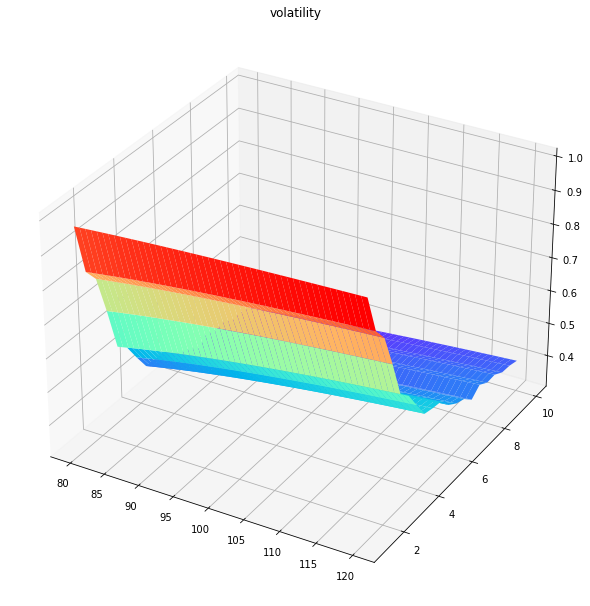

In [12]:
S0 = 100
Ks = np.linspace(80, 120, num=50, endpoint=True, retstep=False, dtype=None)
T = np.linspace(1, 10, num=20, endpoint=True, retstep=False, dtype=None)
Z = np.zeros([len(T),len(Ks)])
for idx,t in enumerate(T):
    aemc = pf.Sv32McAe(S0, Ks, t ,r=0.05, sigma_0=1, beta=1, rho=-0.5, theta=1.5, kappa=2, vov=0.2, path_num = 100, cp=1)
    aemc.optionPrice_version2()
    Z[idx,:] = aemc.impliedVolatility1()

fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig)
delta = 0.5
# 对x、y数据执行网格化
X, Y = np.meshgrid(Ks,T)

# 绘制3D图形
ax.plot_surface(X, Y, Z,
    rstride=1,  # rstride（row）指定行的跨度
    cstride=1,  # cstride(column)指定列的跨度
    cmap=plt.get_cmap('rainbow'))  # 设置颜色映射
# 设置Z轴范围
# ax.set_zlim(-2, 2)
# 设置标题
plt.title("volatility")
plt.show()

## Case-III

|Parameters | Case III |
|:- - - |- - - -|
|$$S_0$$|100|
|$$\kappa$$|18.32|
|$$\theta$$|0.218|
|$$\epsilon$$|8.56|
|$$\rho$$|-0.99|
|$$V_0$$|0.06|
|$$r$$|0.00|
|$$T$$|0.5|

In [13]:
S0 = 100
Ks = np.array([95,100,105])
aemc = pf.Sv32McAe(S0, Ks, T=0.5,r=0.000, sigma_0=0.245, beta=0, rho=-0.99, theta=0.218, kappa=18.32, vov=8.56, path_num = 1000, cp=1)
output1 = aemc.optionPrice_version1()
output2 = aemc.optionPrice_version2()
output3 = aemc.Bachelier(S0, Ks, T=0.5,r=0.000, sigma=0.245,cp=1)

In [14]:
pd.DataFrame(output1, index = ['Price_mean','Price_std'], columns=['K={}'.format(K) for K in Ks]).T

,Price_mean,Price_std
K=95,4.798651e-93,1.513158e-91
K=100,0.000000e+00,0.000000e+00
K=105,0.000000e+00,0.000000e+00


In [15]:
pd.DataFrame(output2, index = ['Price_mean','Price_std'], columns=['K={}'.format(K) for K in Ks]).T

,Price_mean,Price_std
K=95,5.000082,0.148346
K=100,0.060410,0.075467
K=105,0.000000,0.000000


In [16]:
pd.DataFrame(output3, index=['K={}'.format(K) for K in Ks], columns = ['Bachelier_price'])

,Bachelier_price
K=95,5.000000e+00
K=100,6.911322e-02
K=105,1.088174e-185


|$$K/S_0$$| Case III |
|:- - - |- - - -|
|0.95|10.055|
|1|7.042|
|1.05|4.586|

In [17]:
S0=100
Ks=np.linspace(80, 120, num=50, endpoint=True, retstep=False, dtype=None)
T=np.linspace(1, 10, num=20, endpoint=True, retstep=False, dtype=None)
Z = np.zeros([len(T),len(Ks)])
for idx,t in enumerate(T):
    aemc = pf.Sv32McAe(S0, Ks, T=t,r=0.000, sigma_0=0.245, beta=0, rho=-0.99, theta=0.218, kappa=18.32, vov=8.56, path_num = 100, cp=1)
    aemc.optionPrice_version2()
    Z[idx,:] = aemc.impliedVolatility1()

fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig)
delta = 0.5
# 对x、y数据执行网格化
X, Y = np.meshgrid(Ks,T)

# 绘制3D图形
ax.plot_surface(X, Y, Z,
    rstride=1,  # rstride（row）指定行的跨度
    cstride=1,  # cstride(column)指定列的跨度
    cmap=plt.get_cmap('rainbow'))  # 设置颜色映射
# 设置Z轴范围
# ax.set_zlim(-2, 2)
# 设置标题
plt.title("volatility")
plt.show()

ValueError: f(a) and f(b) must have different signs

## Case-IV

|Parameters | Case IV |
|:- - - |- - - -|
|$$S_0$$|100|
|$$\kappa$$|19.76|
|$$\theta$$|0.218|
|$$\epsilon$$|3.20|
|$$\rho$$|-0.99|
|$$V_0$$|0.06|
|$$r$$|0.00|
|$$T$$|0.5|

In [18]:
S0=100
Ks = np.array([95,100,105])
aemc = pf.Sv32McAe(S0, Ks, T=0.5,r=0.000, sigma_0=0.245, beta=0, rho=-0.99, theta=0.218, kappa=19.76, vov=3.20, path_num = 1000, cp=1)
output1 = aemc.optionPrice_version1()
output2 = aemc.optionPrice_version2()
output3 = aemc.Bachelier(S0, Ks, T=0.5,r=0.000, sigma=0.245,cp=1)

In [19]:
pd.DataFrame(output1, index = ['Price_mean','Price_std'], columns=['K={}'.format(K) for K in Ks]).T

,Price_mean,Price_std
K=95,1.327771e-84,4.196681e-83
K=100,0.000000e+00,0.000000e+00
K=105,0.000000e+00,0.000000e+00


In [20]:
pd.DataFrame(output2, index = ['Price_mean','Price_std'], columns=['K={}'.format(K) for K in Ks]).T

,Price_mean,Price_std
K=95,4.996817,0.217825
K=100,0.085384,0.110352
K=105,0.000000,0.000000


In [21]:
pd.DataFrame(output3, index=['K={}'.format(K) for K in Ks], columns = ['Bachelier_price'])

,Bachelier_price
K=95,5.000000e+00
K=100,6.911322e-02
K=105,1.088174e-185


|$$K/S_0$$| Case IV |
|:- - - |- - - -|
|0.95|11.657|
|1|8.926|
|1.05|6.636|

In [22]:
S0 = 100
Ks = np.linspace(80, 120, num=50, endpoint=True, retstep=False, dtype=None)
T = np.linspace(1, 10, num=20, endpoint=True, retstep=False, dtype=None)
Z = np.zeros([len(T),len(Ks)])
for idx,t in enumerate(T):
    aemc = pf.Sv32McAe(S0, Ks, T=t,r=0.000, sigma_0=0.245, beta=0, rho=-0.99, theta=0.218, kappa=19.76, vov=3.20, path_num = 1000, cp=1)
    aemc.optionPrice_version2()
    Z[idx,:] = aemc.impliedVolatility1()

fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig)
delta = 0.5
# 对x、y数据执行网格化
X, Y = np.meshgrid(Ks,T)

# 绘制3D图形
ax.plot_surface(X, Y, Z,
    rstride=1,  # rstride（row）指定行的跨度
    cstride=1,  # cstride(column)指定列的跨度
    cmap=plt.get_cmap('rainbow'))  # 设置颜色映射
# 设置Z轴范围
# ax.set_zlim(-2, 2)
# 设置标题
plt.title("volatility")
plt.show()

ValueError: f(a) and f(b) must have different signs

## Case V

|Parameters | Case V |
|:- - - |- - - -|
|$$S_0$$|100|
|$$\kappa$$|20.48|
|$$\theta$$|0.218|
|$$\epsilon$$|3.20|
|$$\rho$$|-0.99|
|$$V_0$$|0.06|
|$$r$$|0.00|
|$$T$$|0.5|

## Case V

In [23]:
S0=100
Ks = np.array([95,100,105])
aemc = pf.Sv32McAe(S0, Ks, T=0.5,r=0.000, sigma_0=0.245, beta=0, rho=-0.99, theta=0.218, kappa=20.48, vov=3.20, path_num = 1000, cp=1)
output1 = aemc.optionPrice_version1()
output2 = aemc.optionPrice_version2()
output3 = aemc.Bachelier(S0, Ks, T=0.5,r=0.000, sigma=0.245,cp=1)

In [24]:
pd.DataFrame(output1, index = ['Price_mean','Price_std'], columns=['K={}'.format(K) for K in Ks]).T

,Price_mean,Price_std
K=95,5.026030e-97,1.431104e-95
K=100,0.000000e+00,0.000000e+00
K=105,0.000000e+00,0.000000e+00


In [25]:
pd.DataFrame(output2, index = ['Price_mean','Price_std'], columns=['K={}'.format(K) for K in Ks]).T

,Price_mean,Price_std
K=95,4.994037,0.216865
K=100,0.082450,0.107875
K=105,0.000000,0.000000


In [26]:
pd.DataFrame(output3, index=['K={}'.format(K) for K in Ks], columns = ['Bachelier_price'])

,Bachelier_price
K=95,5.000000e+00
K=100,6.911322e-02
K=105,1.088174e-185


|$$K/S_0$$| Case V |
|:- - - |- - - -|
|0.95|11.724|
|1|8.999|
|1.05|6.710|

In [19]:
S0 = 100
Ks = np.linspace(80, 120, num=50, endpoint=True, retstep=False, dtype=None)
T = np.linspace(1, 10, num=20, endpoint=True, retstep=False, dtype=None)
Z = np.zeros([len(T),len(Ks)])
for idx,t in enumerate(T):
    aemc = pf.Sv32McAe(S0, Ks, T=t,r=0.000, sigma_0=0.245, beta=0, rho=-0.99, theta=0.218, kappa=20.48, vov=3.20, path_num = 1000, cp=1)
    aemc.optionPrice_version2()
    Z[idx,:] = aemc.impliedVolatility1()

fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig)
delta = 0.5
# 对x、y数据执行网格化
X, Y = np.meshgrid(Ks,T)

# 绘制3D图形
ax.plot_surface(X, Y, Z,
    rstride=1,  # rstride（row）指定行的跨度
    cstride=1,  # cstride(column)指定列的跨度
    cmap=plt.get_cmap('rainbow'))  # 设置颜色映射
# 设置Z轴范围
# ax.set_zlim(-2, 2)
# 设置标题
plt.title("volatility")
plt.show()

ValueError: f(a) and f(b) must have different signs

# Part 3: Analysis:

Strengths:

Compared with exact MC method, almost exact MC method is not that time-consuming. For exact MC method, the most time consuming step when sampling from the conditional distribution is the evaluation of the modified Bessel function of the first kind, $I_\nu(z)$, which has to be evaluated at **complex** $\nu$.Besides, drawing random from numerical CDF is also slow. However, for almost exact method, it supposes $V_T$ subjects to an easy and well-known distribution by matching fisrt and second moment, which saves much time.

Weaknesses:

Almost exact MC is also time-consuming compared with conditional MC. Besides, the outcome we get right now is not accurate. Maybe we need further analysis, e.g inverse gaussian.